# PV Diagnosis

In case of large-scale renewable energy plants, production output is regularly reviewed to ensure ROI. This is different for small plants. By comparing meteorological data with actual production of a PV power plant, we estimate plant's condition and predict next required maintenance. The analysis detects performance losses and, therby, enhances economic profits. This challenge was part of the Energy Hackdays 2019 (https://hack.opendata.ch/project/284).

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sys,os
os.chdir("..")
sys.path.append(os.getcwd())
from preprocessor.paths import (PATH_TO_PLANT_A, PATH_TO_WEATHER)
from preprocessor.preprocessor import Preprocessor

In [3]:
data_plant_a = Preprocessor(PATH_TO_PLANT_A, "timestamp").df_indexed_utc
data_weather = Preprocessor(PATH_TO_WEATHER, "local_time").df_indexed_utc
df = pd.merge(left=data_plant_a, right=data_weather,
                left_index=True, right_index=True)

## Descriptive Analysis

## Power Plant Data

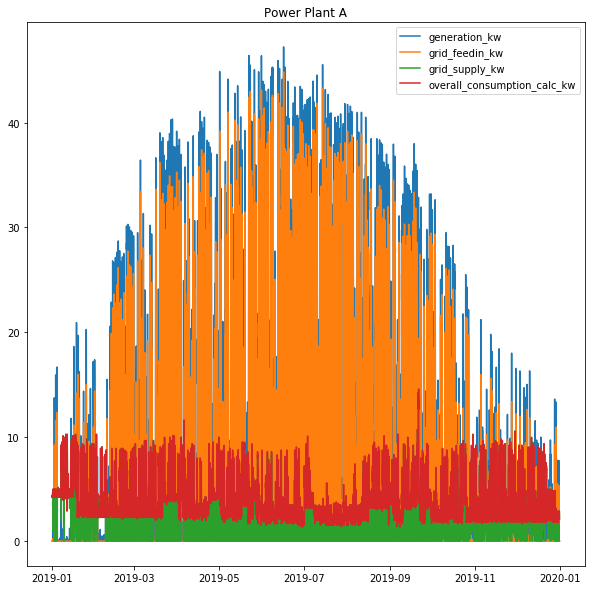

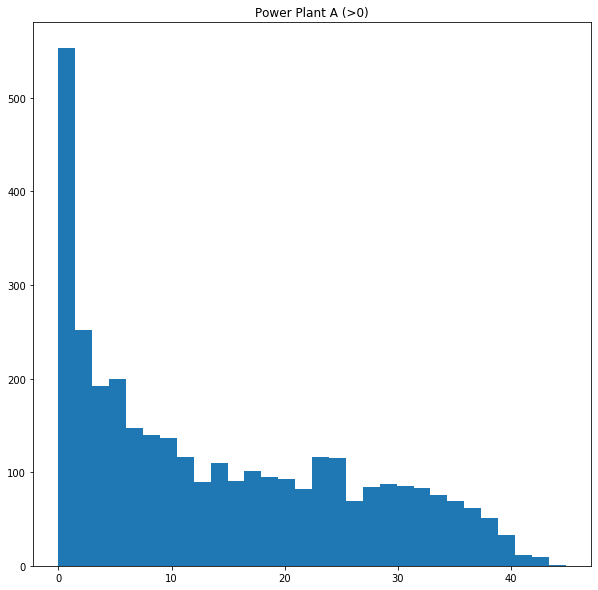

In [120]:
plt.plot(data_plant_a)
plt.title("Power Plant A")
plt.legend(data_plant_a.columns)
plt.show()

plt.hist(data_plant_a["grid_feedin_kw"]
    , bins = 30
    , range = (0.0001, max(data_plant_a["grid_feedin_kw"]))
    )
plt.title("Power Plant A (>0)")
plt.show()

### Weather Data

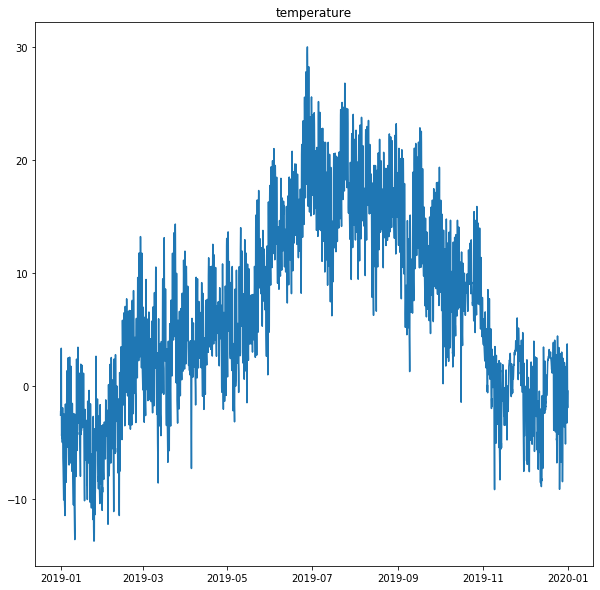

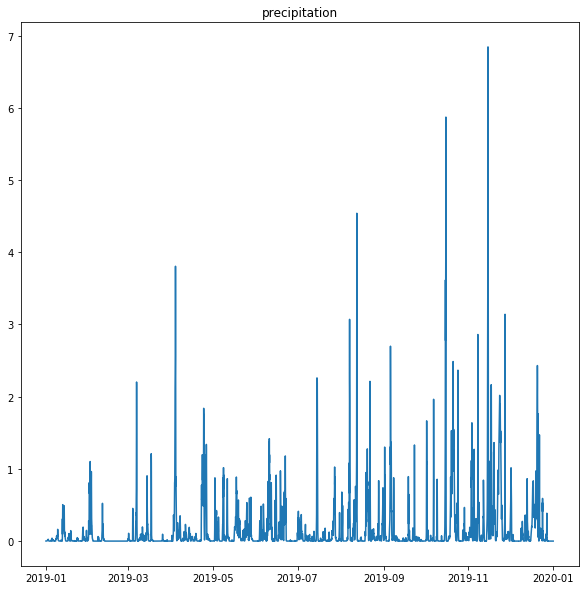

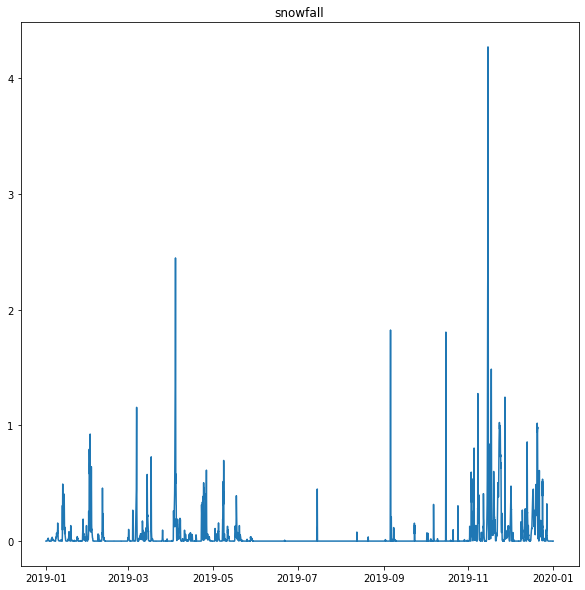

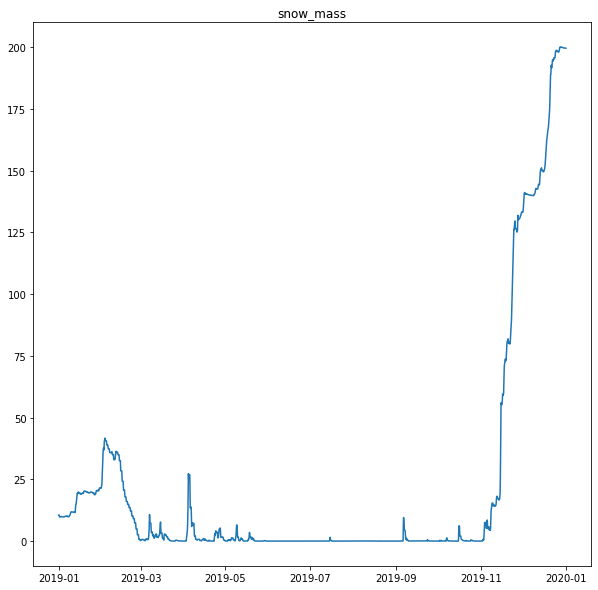

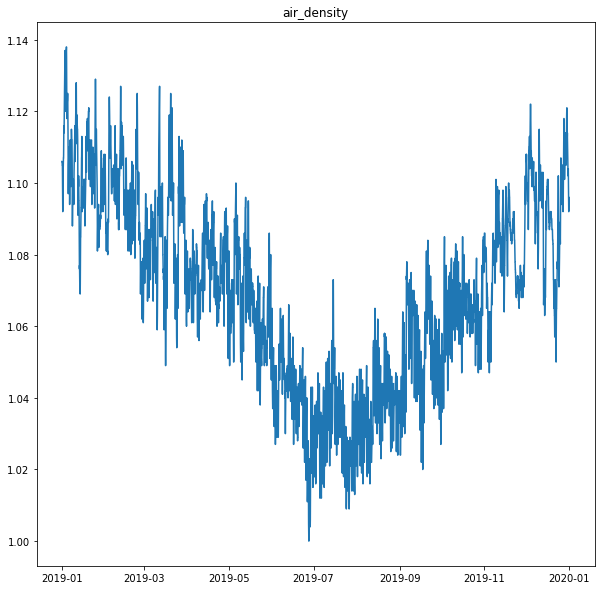

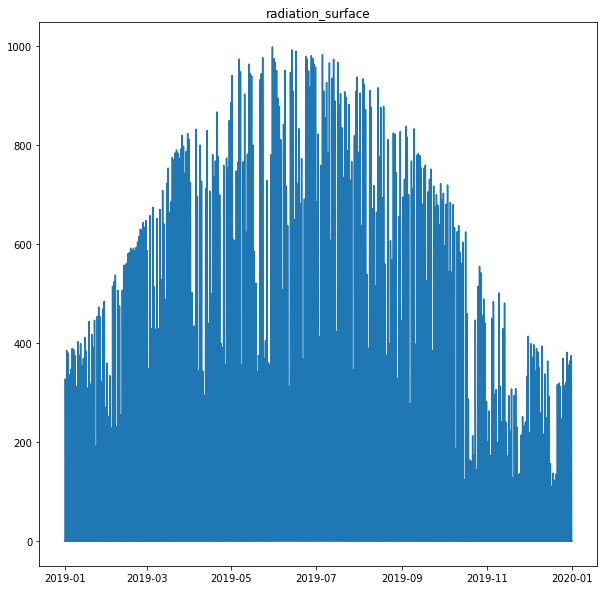

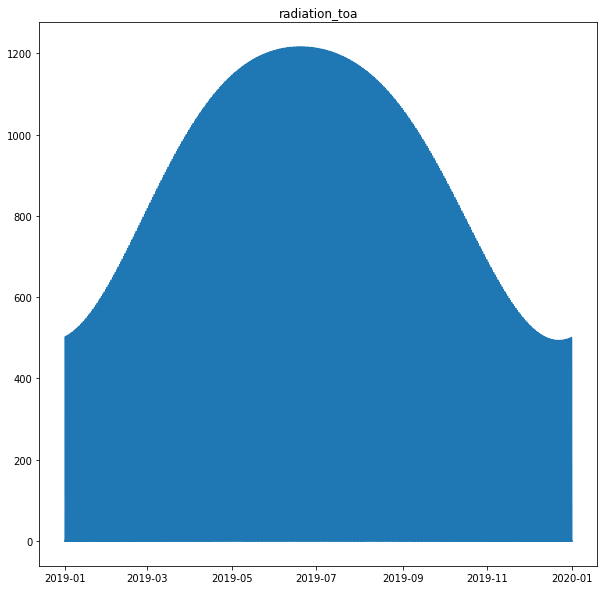

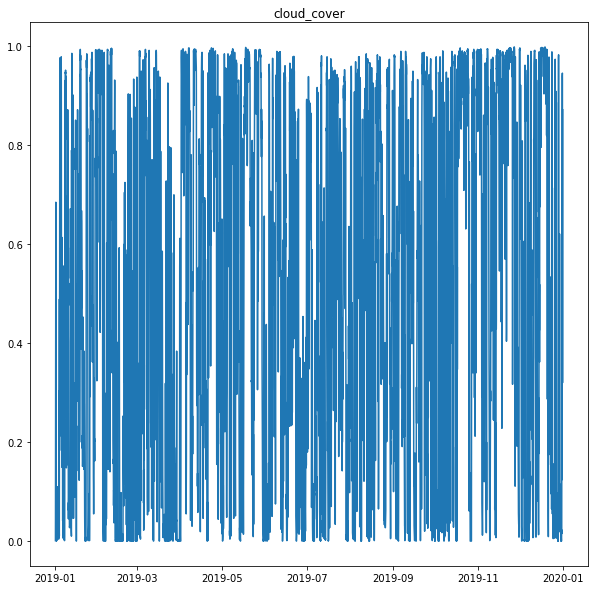

In [121]:
data_weather_clean = data_weather.interpolate()

plt.plot(data_weather_clean["temperature"])
plt.title("temperature")
plt.show()

plt.plot(data_weather_clean["precipitation"])
plt.title("precipitation")
plt.show()

plt.plot(data_weather_clean["snowfall"])
plt.title("snowfall")
plt.show()

plt.plot(data_weather_clean["snow_mass"])
plt.title("snow_mass")
plt.show()

plt.plot(data_weather_clean["air_density"])
plt.title("air_density")
plt.show()

plt.plot(data_weather_clean["radiation_surface"])
plt.title("radiation_surface")
plt.show()

plt.plot(data_weather_clean["radiation_toa"])
plt.title("radiation_toa")
plt.show()

plt.plot(data_weather_clean["cloud_cover"])
plt.title("cloud_cover")
plt.show()


## Time Series Plot

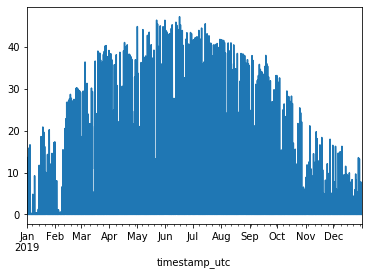

In [89]:
df["generation_kw"].plot()
plt.show()

## Distribution Plots

generation_kw


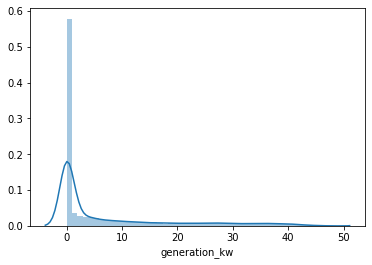

grid_feedin_kw


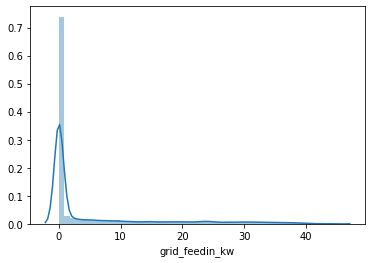

grid_supply_kw


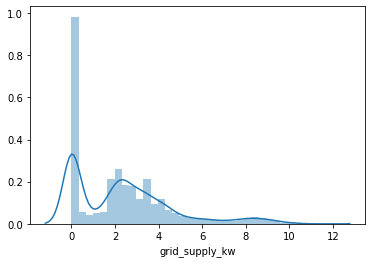

overall_consumption_calc_kw


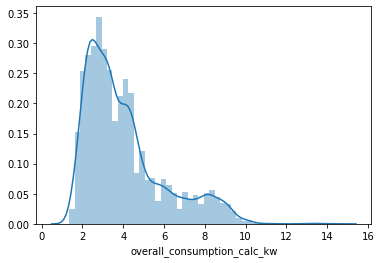

temperature


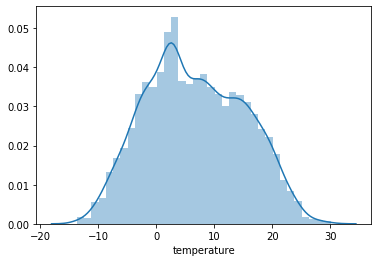

precipitation


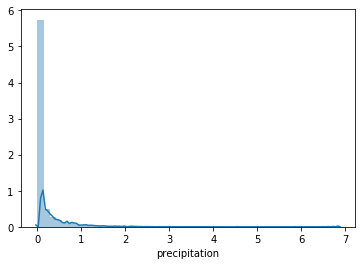

snowfall


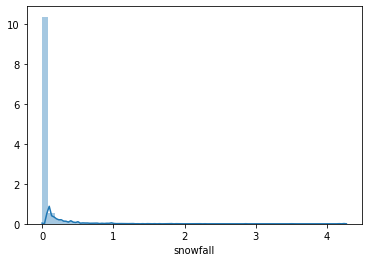

snow_mass


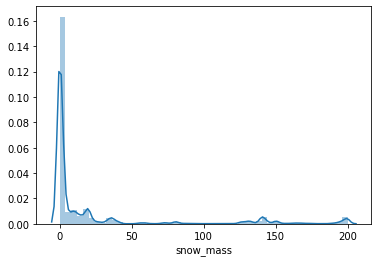

air_density


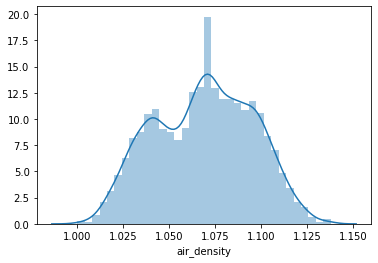

radiation_surface


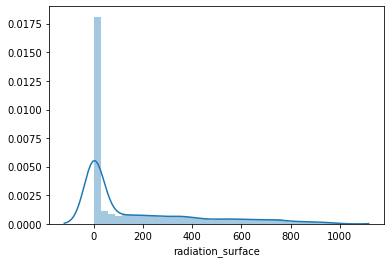

radiation_toa


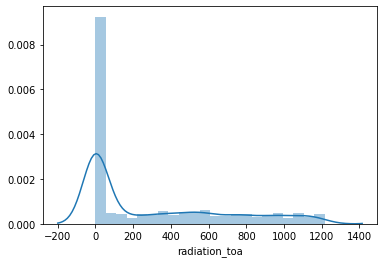

cloud_cover


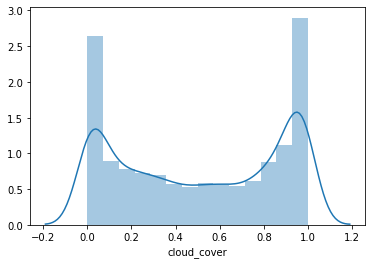

In [28]:
for col in df.columns:
    print(col)
    sns.distplot(df[col])
    plt.show()

## Correlation Analysis

In the following matrix you will see which features correlate with each other.  
A dark green indicates a strong positive correlation and a dark brown a strong negative one.

In [26]:
def corr_heatmap(df):
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title('Correlation matrix')
    return plt.show()

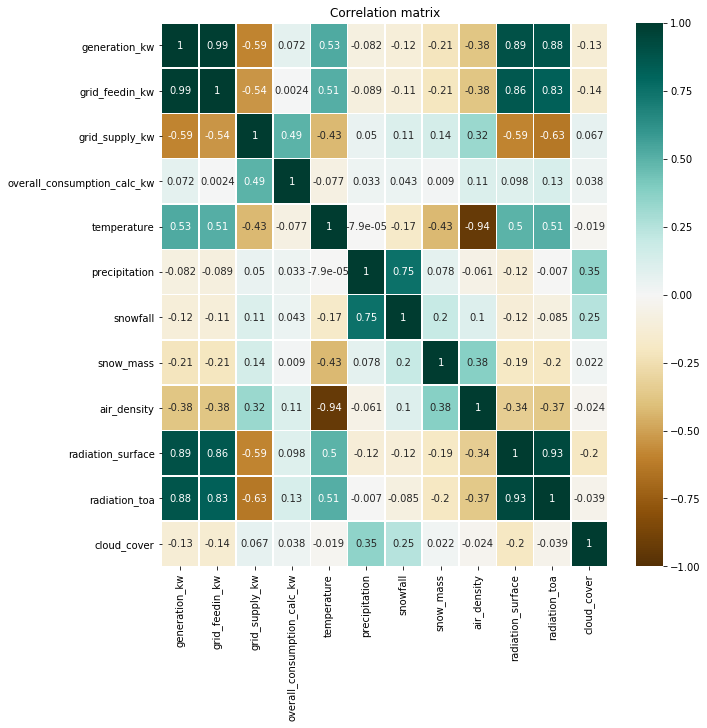

In [94]:
corr_heatmap(df.corr())

Actual production (*generation_kw*) is highly correlated with *radiation_surface* and *radiation_toa*

## Predict actual production based on weather data

In [33]:
df.columns

Index(['generation_kw', 'grid_feedin_kw', 'grid_supply_kw',
       'overall_consumption_calc_kw', 'temperature', 'precipitation',
       'snowfall', 'snow_mass', 'air_density', 'radiation_surface',
       'radiation_toa', 'cloud_cover'],
      dtype='object')

In [74]:
# separate our my predictor variables (X) from my outcome variable y
predictors = ['radiation_surface', 'precipitation', "temperature"]
X = df[predictors]
y = df['generation_kw']

### Scatterplots: dependend variable against independent variables

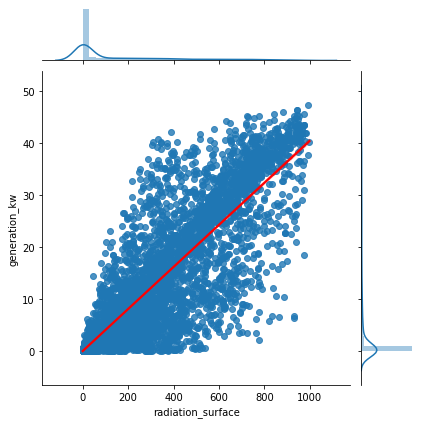

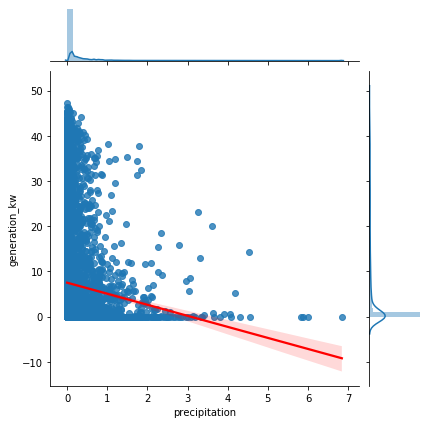

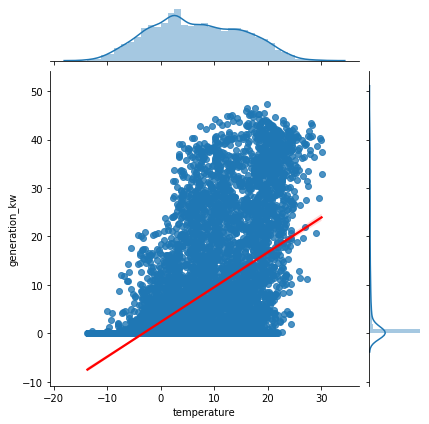

In [85]:
for x in predictors:
    g = sns.jointplot(data=df, y=y, x=x, kind='reg', joint_kws={'line_kws':{'color':'red'}})
    plt.show()

## Linear Regression

In [91]:
# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)

# (1) select a significance value
alpha = 0.05

# (2) Fit the model
model = sm.OLS(y, X).fit()

# (3) evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          generation_kw   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                 1.223e+04
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        18:46:15   Log-Likelihood:                -26610.
No. Observations:                8759   AIC:                         5.323e+04
Df Residuals:                    8755   BIC:                         5.326e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7065      0.075     -9.396      0.000      -0.854      -0.559
radiation_surface     0.0382      0.000    154.448      0.000       0.038       0.039
precipitation         0.5739      0.140      4.086      0.000       0.299       0.849
temperature           0.1465      0.007     19.791      0.000       0.132       0.161
==============================================================================
Omnibus:                     1069.994   Durbin-Watson:                   0.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11615.566
Skew:                          -0.091   Prob(JB):                         0.00
Kurtosis:                       8.639   Cond. No.                         821.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Time Series Analysis

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [101]:
df.head()

,generation_kw,grid_feedin_kw,grid_supply_kw,overall_consumption_calc_kw,temperature,precipitation,snowfall,snow_mass,air_density,radiation_surface,radiation_toa,cloud_cover,time
timestamp_utc,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,0.0,0.0,4.212,4.212,-2.542,0.001,0.0,10.513,1.106,0.0,0.0,0.001,00:00:00
2019-01-01 01:00:00+00:00,0.0,0.0,4.364,4.364,-2.190,0.001,0.0,10.515,1.106,0.0,0.0,0.043,01:00:00
2019-01-01 02:00:00+00:00,0.0,0.0,4.214,4.214,-2.182,0.001,0.0,10.516,1.106,0.0,0.0,0.171,02:00:00
2019-01-01 03:00:00+00:00,0.0,0.0,4.364,4.364,-2.230,0.000,0.0,10.517,1.106,0.0,0.0,0.379,03:00:00
2019-01-01 04:00:00+00:00,0.0,0.0,4.214,4.214,-2.113,0.000,0.0,10.517,1.105,0.0,0.0,0.558,04:00:00


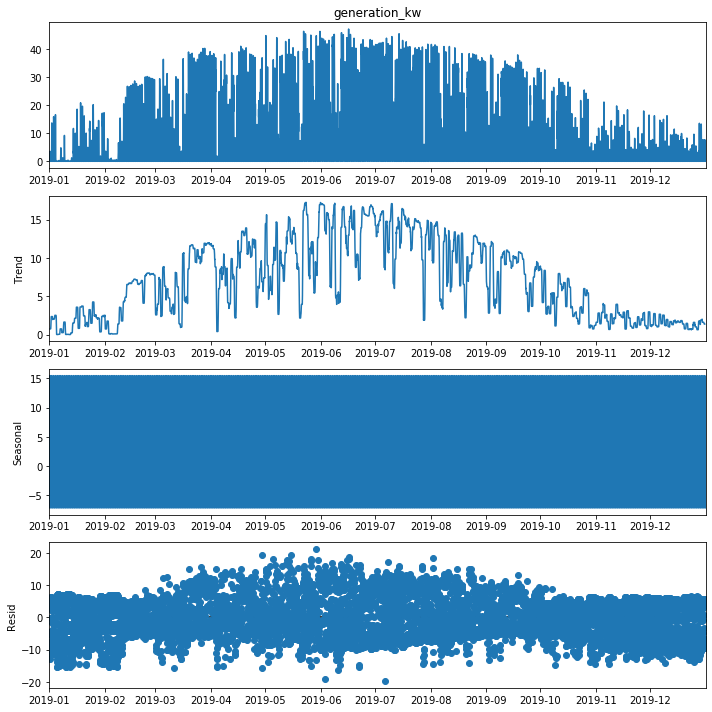

In [112]:
y = df['generation_kw']
result_add = seasonal_decompose(y, model='additive')
result_add.plot()
plt.show()